<a href="https://colab.research.google.com/github/pranavaggarwal19/college-project-ProTelChurn-/blob/main/project_backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump, load

In [ ]:
# Load the dataset
df = pd.read_csv('telecom.csv')  # Replace 'telecom.csv' with the actual file path


Missing Values per Column:

Data Types:

Unique values in 'Customer ID':

Unique values in 'Gender':

Unique values in 'Married':

Unique values in 'Offer':

Unique values in 'Phone Service':

Unique values in 'Multiple Lines':

Unique values in 'Internet Service':

Unique values in 'Internet Type':

Unique values in 'Online Security':

Unique values in 'Online Backup':

Unique values in 'Device Protection Plan':

Unique values in 'Premium Tech Support':

Unique values in 'Streaming TV':

Unique values in 'Streaming Movies':

Unique values in 'Streaming Music':

Unique values in 'Unlimited Data':

Unique values in 'Contract':

Unique values in 'Paperless Billing':

Unique values in 'Payment Method':

Unique values in 'Customer Status':

Unique values in 'Churn Category':

Unique values in 'Churn Reason':

Summary statistics for 'Age':

Summary statistics for 'Number of Dependents':

Summary statistics for 'Number of Referrals':

Summary statistics for 'Tenure':

Summary statistics for

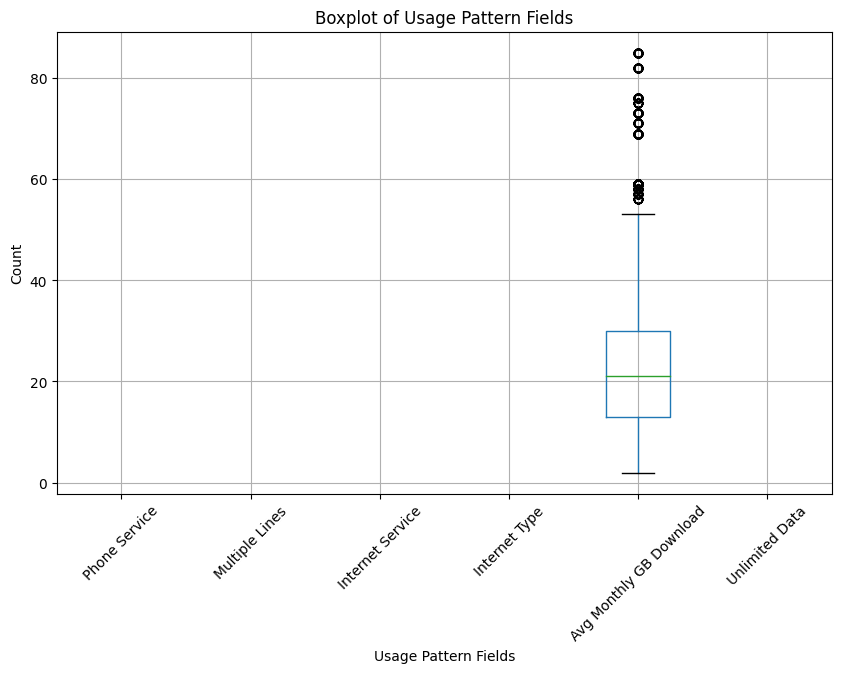

Negative values in 'Phone Service': 0
Count of potential outliers in 'Phone Service': 0
Negative values in 'Multiple Lines': 0
Count of potential outliers in 'Multiple Lines': 0
Negative values in 'Internet Service': 0
Count of potential outliers in 'Internet Service': 0
Negative values in 'Internet Type': 0
Count of potential outliers in 'Internet Type': 0
Negative values in 'Avg Monthly GB Download': 0
Count of potential outliers in 'Avg Monthly GB Download': 245
Negative values in 'Unlimited Data': 0
Count of potential outliers in 'Unlimited Data': 0

Summary Statistics:

Missing Values per Column:

Data Types:


<ipython-input-3-ea0484d2c9e0>:65: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


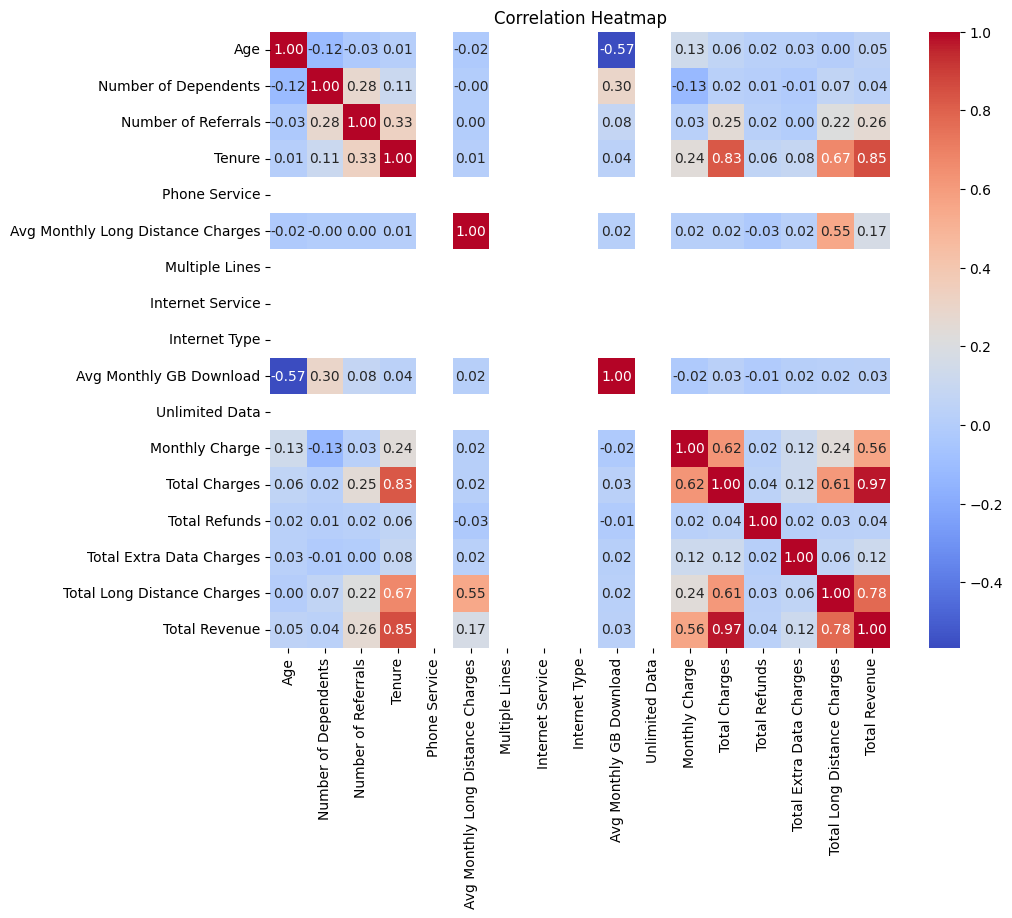

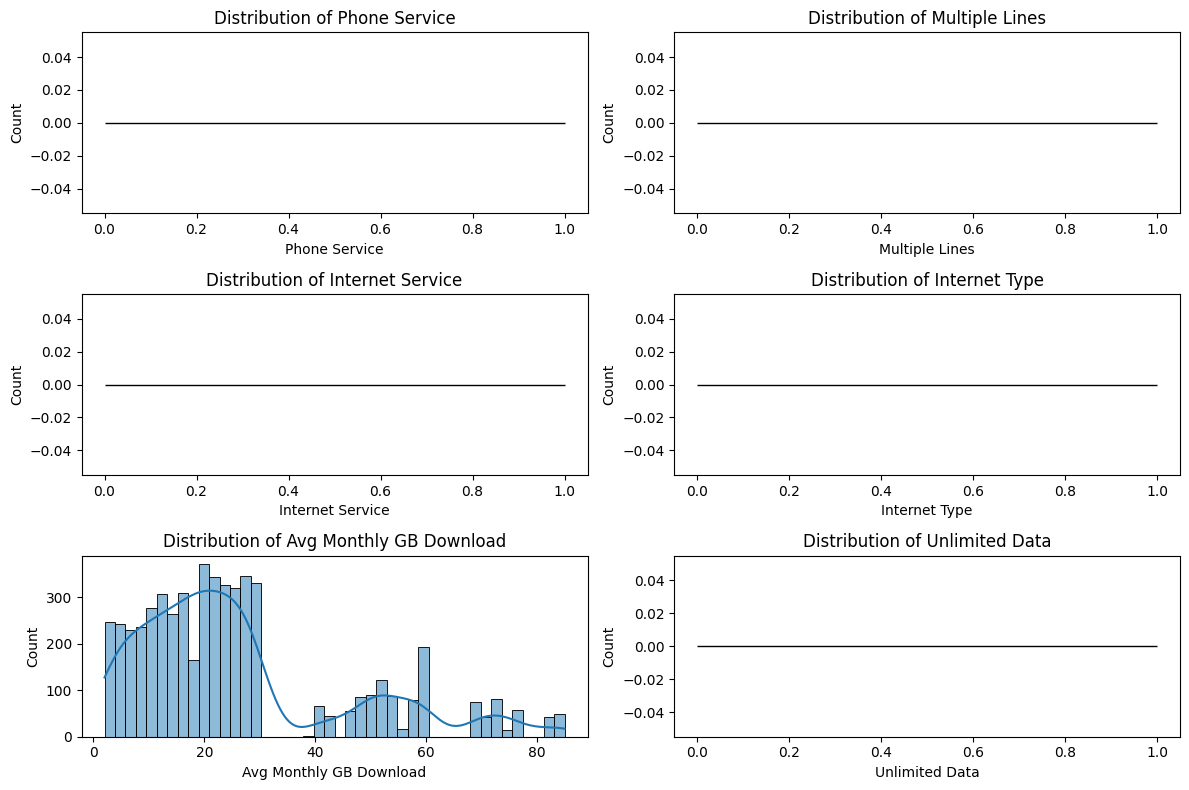

In [ ]:
# Display the first few rows of the dataset to inspect the data
df.head()

# Check for missing values in each column
print("\nMissing Values per Column:")
df.isnull().sum()

# Check data types of columns
print("\nData Types:")
df.dtypes

# Check for unique values and value counts in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    df[col].value_counts()

# Check for outliers or unusual values in numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_columns:
    print(f"\nSummary statistics for '{col}':")
    df[col].describe()

# Usage pattern columns to be checked
usage_columns = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Unlimited Data']

# Convert columns to numeric types
df[usage_columns] = df[usage_columns].apply(pd.to_numeric, errors='coerce')

# Summary statistics for usage pattern columns
df[usage_columns].describe()

# Box plots to visualize outliers
plt.figure(figsize=(10, 6))
df[usage_columns].boxplot()
plt.title('Boxplot of Usage Pattern Fields')
plt.ylabel('Count')
plt.xlabel('Usage Pattern Fields')
plt.xticks(rotation=45)
plt.show()

# Check for any negative values or unreasonable counts
for col in usage_columns:
    negative_values = (df[col] < 0).sum()
    print(f"Negative values in '{col}': {negative_values}")

    # Check for extremely high values (potential outliers)
    extreme_values = (df[col] > df[col].quantile(0.95)).sum()  # Considering top 5% as potential outliers
    print(f"Count of potential outliers in '{col}': {extreme_values}")

# Display the first few rows of the dataset
print("\nSummary Statistics:")
df.describe()

# Check for missing values
print("\nMissing Values per Column:")
df.isnull().sum()

# Check data types of columns
print("\nData Types:")
df.dtypes

# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Distribution of usage pattern columns
plt.figure(figsize=(12, 8))
num_cols = len(usage_columns)
for i, col in enumerate(usage_columns, 1):
    plt.subplot((num_cols // 2) + (num_cols % 2), 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Assume 'Churn' is the target variable
X = df.drop('Customer Status', axis=1)  # Features
y = df['Customer Status']  # Target variable

# Additional features 'Churn Category' and 'Churn Reason'
additional_features = ['Churn Category', 'Churn Reason']

# Include additional features in the dataset for further analysis or interpretation
X_additional = df[additional_features]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate numerical and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numerical features: Scaling with imputation of missing values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features: One-hot encoding with imputation of missing values
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

# Fit the model
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)

# Evaluate model performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on training data: {train_accuracy:.2f}")

# Print classification report and confusion matrix for training data
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_train_pred))

print("\nConfusion Matrix (Training Data):")
print(confusion_matrix(y_train, y_train_pred))


Accuracy on training data: 0.98

Classification Report (Training Data):
              precision    recall  f1-score   support

     Churned       1.00      0.92      0.96      1496
      Joined       0.89      1.00      0.94       357
      Stayed       0.98      1.00      0.99      3781

    accuracy                           0.98      5634
   macro avg       0.96      0.97      0.96      5634
weighted avg       0.98      0.98      0.98      5634


Confusion Matrix (Training Data):
[[1376   43   77]
 [   1  356    0]
 [   4    0 3777]]


In [ ]:
# Further analysis or interpretation using 'Churn Category' and 'Churn Reason'
# Example: Display unique values or perform additional analysis
print("\nUnique values in Churn Category:")
print(X_additional['Churn Category'].unique())

print("\nUnique values in Churn Reason:")
print(X_additional['Churn Reason'].unique())


Unique values in Churn Category:
[nan 'Competitor' 'Dissatisfaction' 'Other' 'Price' 'Attitude']

Unique values in Churn Reason:
[nan 'Competitor had better devices' 'Product dissatisfaction'
 'Network reliability' 'Limited range of services'
 'Competitor made better offer' "Don't know" 'Long distance charges'
 'Attitude of service provider' 'Attitude of support person'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Lack of affordable download/upload speed'
 'Deceased' 'Moved' 'Service dissatisfaction' 'Price too high'
 'Lack of self-service on Website' 'Poor expertise of online support'
 'Extra data charges' 'Poor expertise of phone support']


In [ ]:
# Save the trained model
dump(clf, 'saved_model.pkl')

# Load the saved model
saved_model = 'saved_model.pkl'  # Replace 'saved_model.pkl' with the path to your saved model
model = load(saved_model)  # Load the saved model

In [ ]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

     Churned       0.95      0.87      0.91       373
      Joined       0.75      0.88      0.81        97
      Stayed       0.97      0.99      0.98       939

    accuracy                           0.95      1409
   macro avg       0.89      0.91      0.90      1409
weighted avg       0.95      0.95      0.95      1409


Confusion Matrix:
[[324  24  25]
 [  8  85   4]
 [ 10   4 925]]
